<a href="https://colab.research.google.com/github/fighaz/PCVK_2024/blob/main/Week5PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : SofiSugiharto Zaini

Kelas: TI-3C

Abs  : 25

Github : https://github.com/fighaz/PCVK_2024/

**Tugas Praktikum**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


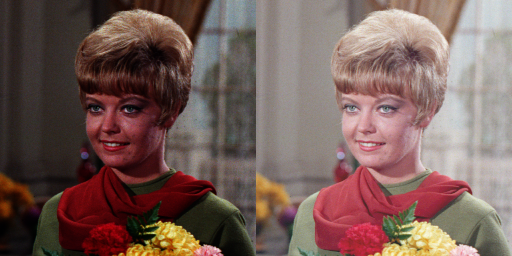

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma_correction = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_correction[y,x,c] = 255*(pow(original[y,x,c]/255, 1/gamma))


final_frame = cv.hconcat((original, gamma_correction))
cv2_imshow(final_frame)


2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.
Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar

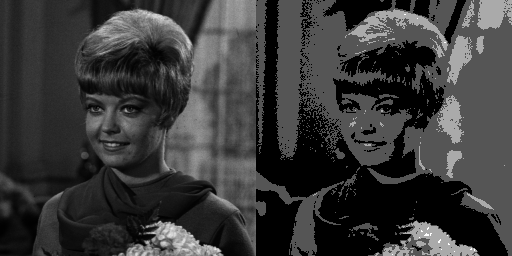

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff',cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = round(original[y,x]/level)*level

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

In [25]:
import glob
noise_images = glob.glob('/content/drive/MyDrive/PCVK/noise/*.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noise/*.jpg'):
 n= cv.imread(img)
 cv_img.append(n)

In [26]:
import math
from math import log10, sqrt
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

galaxy = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

for i in range(len(cv_img)):
  print(PSNR(galaxy,cv_img[i]))
  # final_frame = cv.hconcat((cv_img[i], galaxy))
  # cv2_imshow(final_frame)



27.87502437772565
27.88591020738993
27.879764384870306
27.87720720820184
27.884956174143092
27.884396333167174
27.89709805509944
27.886675619752374
27.88140495827284
27.88661181586608
27.883526723348165
27.879073177335307
27.89996188227485
27.87738237762258
27.866537615066353
27.87370856935883
27.89579697091828
27.888300348014997
27.885436267678315
27.891713393892523
27.878634408017064
27.89252213533592
27.88569762636099
27.877571492816536
27.884534218334704
27.873831501113866
27.889160044087404
27.884457863882297
27.88665751314884
27.89737290887623
27.885540395506023
27.87708710594318
27.891683008592807
27.864371977050013
27.886510248910565
27.87997443734783
27.87626007355629
27.88412057596467
27.882156657075893
27.890131051411238
27.897646915646877
27.883500530906385
27.88763951735952
27.88396409153966
27.883294615567415
27.87581608390368
27.894782195368396
27.87505877429982
27.878686218013623
27.883529652775817
27.88907532635998
27.8763841097728
27.888950754617824
27.87911552462099


4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

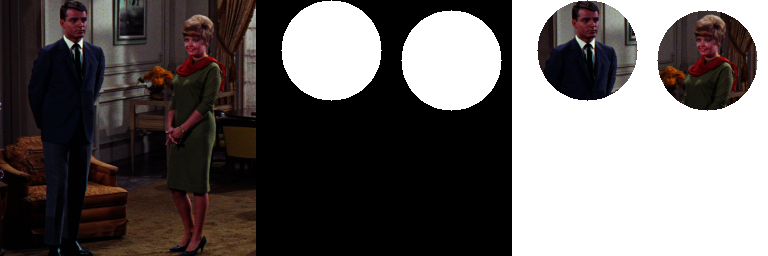

In [ ]:

couple = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(couple.shape, couple.dtype)
cv.circle(mask, center=(75,50), radius=50, color=(255,255,255), thickness=cv.FILLED)
cv.circle(mask, center=(195,60), radius=50, color=(255,255,255), thickness=cv.FILLED)
# menggabungkan gambar 1 dan mask
masked = cv.bitwise_and(couple,mask)
whitebg = np.full(couple.shape,255 ,couple.dtype)
# menggabungkan gambar 2 hasil mask dan bgputih
res = np.where(mask != 0, masked, whitebg)
final_frame = cv.hconcat((couple, mask,res))
cv2_imshow(final_frame)


5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu



1.   NOT



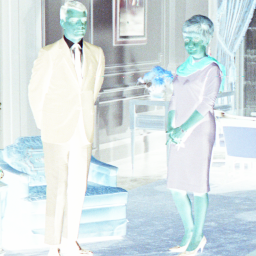

In [ ]:
couple = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(couple.shape, couple.dtype)
cv.circle(mask, center=(75,50), radius=50, color=(255,255,255), thickness=cv.FILLED)
cv.circle(mask, center=(195,60), radius=50, color=(255,255,255), thickness=cv.FILLED)
image_masked = cv.bitwise_not(couple,mask)
cv2_imshow(image_masked)



2. OR (Atau)

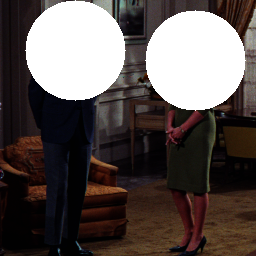

In [ ]:
couple = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(couple.shape, couple.dtype)
cv.circle(mask, center=(75,50), radius=50, color=(255,255,255), thickness=cv.FILLED)
cv.circle(mask, center=(195,60), radius=50, color=(255,255,255), thickness=cv.FILLED)
image_masked = cv.bitwise_or(couple,mask)
cv2_imshow(image_masked)

3. AND (Dan)

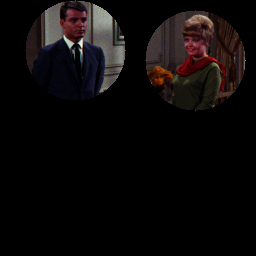

In [ ]:
couple = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(couple.shape, couple.dtype)
cv.circle(mask, center=(75,50), radius=50, color=(255,255,255), thickness=cv.FILLED)
cv.circle(mask, center=(195,60), radius=50, color=(255,255,255), thickness=cv.FILLED)
image_masked = cv.bitwise_and(couple, mask)
cv2_imshow(image_masked)

4. NAND

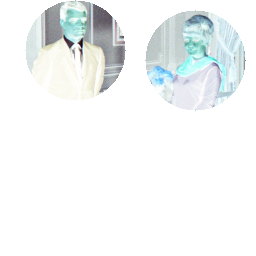

In [ ]:
couple = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(couple.shape, couple.dtype)
cv.circle(mask, center=(75,50), radius=50, color=(255,255,255), thickness=cv.FILLED)
cv.circle(mask, center=(195,60), radius=50, color=(255,255,255), thickness=cv.FILLED)
image_masked = cv.bitwise_and(couple, mask)
image_masked = cv.bitwise_not(image_masked)
cv2_imshow(image_masked)

5. XOR
(Exlusive Or)

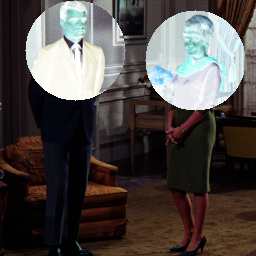

In [ ]:
couple = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(couple.shape, couple.dtype)
cv.circle(mask, center=(75,50), radius=50, color=(255,255,255), thickness=cv.FILLED)
cv.circle(mask, center=(195,60), radius=50, color=(255,255,255), thickness=cv.FILLED)
image_masked = cv.bitwise_xor(couple,mask)
cv2_imshow(image_masked)